Para la realización de contraste el equipo debe 2 imágenes que tengan poca luz además de la que se orienta.

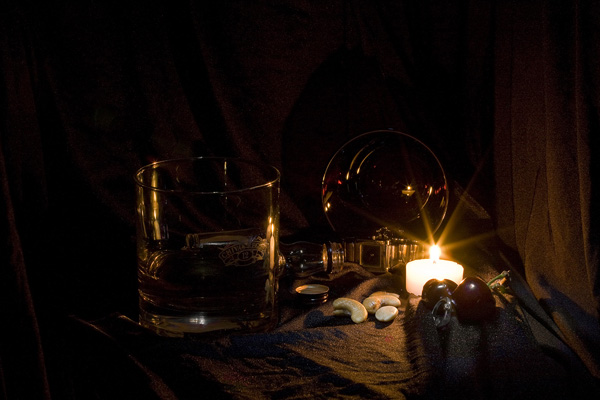


Realizar el ajuste con diferentes valores de γ. menores a uno, igual a uno y mayores a uno

Concluya que rango de valores de γ es el adecuado para las imágenes que trabajó. 

x1 es la imagen en escla de gris.¿Para que se usa stretchlim(x1)?

In [11]:
import numpy as np
import bisect
from numba import jit

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

@jit
def imadjust(src, tol=1, vin=[0,255], vout=(0,255)):
    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    assert len(src.shape) == 2 ,'Input image should be 2-dims'

    tol = max(0, min(100, tol))

    if tol > 0:
        # Compute in and out limits
        # Histogram
        hist = np.histogram(src,bins=list(range(256)),range=(0,255))[0]

        # Cumulative histogram
        cum = hist.copy()
        for i in range(1, 256): cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
        total = src.shape[0] * src.shape[1]
        low_bound = total * tol / 100
        upp_bound = total * (100 - tol) / 100
        vin[0] = bisect.bisect_left(cum, low_bound)
        vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    vs[src<vin[0]]=0
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    dst = vd

    return dst




def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

Se contruyo una funcion equivalente  a imadjust utilizada en Optave para realizar las pruebas de contraste. 
Referencia:
https://stackoverflow.com/questions/39767612/what-is-the-equivalent-of-matlabs-imadjust-in-python


Para realizar los cambios en el contraste se modifican los ultimos valores de la funcion 

imadjust(a,b,c,d,e)




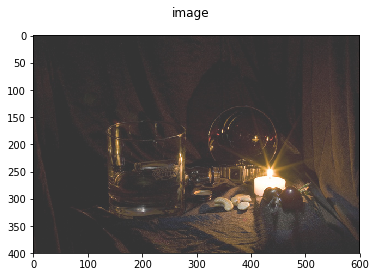

In [18]:


image = Image.open('Imagenes_Pruebas/under.jpg')
arr = np.asarray(image)
arr2=imadjust(arr,arr.min(),arr.max(),.2,1)

fig = plt.figure()
fig.suptitle('image')
plt.imshow(arr2)
plt.show()


Realizar el ajuste con diferentes valores de γ. menores a uno, igual a uno y mayores a uno


Concluya que rango de valores de γ es el adecuado para las imágenes que trabajó.


x1 es la imagen en escla de gris.¿Para que se usa stretchlim(x1)?
stretchlim(x1): no es necesario para este ejercicio. 


